# Titanic Data Set - Statistics Review

[Variable Descriptions](https://www.kaggle.com/c/titanic/data).

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('titanic.csv')

**Describe the data. **
- How big?
- What are the columns and what do they mean?

In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df.shape

(891, 12)

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**What’s the average age of:**

- Any Titanic passenger
- A survivor
- A non-surviving first-class passenger
- Male survivors older than 30 from anywhere but Queenstown

In [6]:
df.groupby('Survived')['Age'].mean()

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

In [7]:
df.groupby(['Survived', 'Pclass'])['Age'].mean()

Survived  Pclass
0         1         43.695312
          2         33.544444
          3         26.555556
1         1         35.368197
          2         25.901566
          3         20.646118
Name: Age, dtype: float64

In [8]:
conditional_mask = (df['Age'] > 30) & (df['Embarked'] != 'Q')
df.loc[conditional_mask].groupby(['Survived', 'Sex'])['Age'].mean()

Survived  Sex   
0         female    42.470588
          male      43.771242
1         female    42.176829
          male      41.487805
Name: Age, dtype: float64

In [9]:
# Printout of final answers
print('Average age of:')
print('-------------------------')
print('Any Titanic passenger: %.2f' % df['Age'].mean())
print('A survivor: %.2f' % df.groupby('Survived')['Age'].mean()[1])
print('A non-surviving first-class passenger: %.2f' % df.groupby(['Survived', 'Pclass'])['Age'].mean()[0][1])
print('Male survivors older than 30 from anywhere but Queenstown: %.2f' %\
      df.loc[conditional_mask].groupby(['Survived', 'Sex'])['Age'].mean()[1][1])


Average age of:
-------------------------
Any Titanic passenger: 29.70
A survivor: 28.34
A non-surviving first-class passenger: 43.70
Male survivors older than 30 from anywhere but Queenstown: 41.49


**For the groups from the previous task, how far (in years) are the average ages from the median ages?**

In [10]:
print('Difference between mean and median for...')
print('-------------------------')
print('Any Titanic passenger: %.3f years' % (df['Age'].mean() - df['Age'].median()))
print('A survivor: %.3f years' % (df.groupby('Survived')['Age'].mean()[1] \
                                  - df.groupby('Survived')['Age'].median()[1]))
print('A non-surviving first-class passenger: %.3f years' % \
      (df.groupby(['Survived', 'Pclass'])['Age'].mean()[0][1] \
       - df.groupby(['Survived', 'Pclass'])['Age'].median()[0][1]))
print('Male survivors older than 30 from anywhere but Queenstown: %.3f years' % \
      (df.loc[conditional_mask].groupby(['Survived', 'Sex'])['Age'].mean()[1][1] \
       - df.loc[conditional_mask].groupby(['Survived', 'Sex'])['Age'].median()[1][1]))

Difference between mean and median for...
-------------------------
Any Titanic passenger: 1.699 years
A survivor: 0.344 years
A non-surviving first-class passenger: -1.555 years
Male survivors older than 30 from anywhere but Queenstown: 3.488 years


**What’s the most common:**
- Passenger class
- Port of Embarkation
- Number of siblings or spouses aboard for survivors

In [12]:
df.groupby('Pclass')['Name'].count()

Pclass
1    216
2    184
3    491
Name: Name, dtype: int64

Passenger class '3' is the most common.

In [14]:
df.groupby('Embarked')['Name'].count()

Embarked
C    168
Q     77
S    644
Name: Name, dtype: int64

Southampton (S) was the most common port of embarkation.

In [18]:
df.groupby('Survived')['SibSp'].sum()

Survived
0    304
1    162
Name: SibSp, dtype: int64

162 siblings/spouses for survivors.

**Within what range of standard deviations from the mean (0-1, 1-2, 2-3) is the median ticket price? Is it above or below the mean?**

In [19]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [20]:
df['Fare'].mean() - (df['Fare'].std()/2)

7.357493669984148

In [21]:
(df['Fare'].mean() - (df['Fare'].std()/2)) + df['Fare'].std()

57.05092226716505

A: 0-1 SD range is from 7.35-57.05 and 14.45 (median) lies in this range.

**How much more expensive was the 90th percentile ticket than the 5th percentile ticket? Are they the same class?**

In [24]:
df['Fare'].quantile(0.9) - df['Fare'].quantile(0.05)

70.7333

In [25]:
df[df['Fare'] == df['Fare'].quantile(0.9)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
627,628,1,1,"Longley, Miss. Gretchen Fiske",female,21.0,0,0,13502,77.9583,D9,S
765,766,1,1,"Hogeboom, Mrs. John C (Anna Andrews)",female,51.0,1,0,13502,77.9583,D11,S


In [26]:
df[df['Fare'] == df['Fare'].quantile(0.05)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.225,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.225,NaN,C
203,204,0,3,"Youseff, Mr. Gerious",male,45.5,0,0,2628,7.225,NaN,C
244,245,0,3,"Attalah, Mr. Sleiman",male,30.0,0,0,2694,7.225,NaN,C
354,355,0,3,"Yousif, Mr. Wazli",male,NaN,0,0,2647,7.225,NaN,C
522,523,0,3,"Lahoud, Mr. Sarkis",male,NaN,0,0,2624,7.225,NaN,C
553,554,1,3,"Leeni, Mr. Fahim (""Philip Zenni"")",male,22.0,0,0,2620,7.225,NaN,C
598,599,0,3,"Boulos, Mr. Hanna",male,NaN,0,0,2664,7.225,NaN,C
661,662,0,3,"Badt, Mr. Mohamed",male,40.0,0,0,2623,7.225,NaN,C
693,694,0,3,"Saad, Mr. Khalil",male,25.0,0,0,2672,7.225,NaN,C


90th percentile ticket costs 70.73 more than the 5th percentile fare. More expensive fare passengers are "Pclass" 1, the cheaper fare passengers as "Pclass" 3.

**The highest average ticket price was paid by passengers from which port? Null ports don’t count.**

In [27]:
df.groupby('Embarked')['Fare'].mean()

Embarked
C    59.954144
Q    13.276030
S    27.079812
Name: Fare, dtype: float64

Highest average fare was paid by passengers originating from the Cherbourg (C) port.

**What is the most common passenger class for each port?**

In [30]:
df.groupby(['Embarked', 'Pclass'])['Name'].count()

Embarked  Pclass
C         1          85
          2          17
          3          66
Q         1           2
          2           3
          3          72
S         1         127
          2         164
          3         353
Name: Name, dtype: int64

As shown above, Cherbourg had mostly class 1 passengers, Queenstown and Southampton had mostly class 3 passengers.

**What fraction of surviving 1st-class males paid lower than double the overall median ticket price?**

In [33]:
df.groupby(['Survived', 'Pclass', 'Sex'])['Name'].count()

Survived  Pclass  Sex   
0         1       female      3
                  male       77
          2       female      6
                  male       91
          3       female     72
                  male      300
1         1       female     91
                  male       45
          2       female     70
                  male       17
          3       female     72
                  male       47
Name: Name, dtype: int64

In [42]:
male_surv_1st = df.loc[(df['Survived'] == 1) & (df['Pclass'] == 1) & (df['Sex'] == 'male')]
len(male_surv_1st[male_surv_1st['Fare'] < (df['Fare'].median() * 2)])/len(male_surv_1st)

0.24444444444444444

Almost 1/4 of surviving 1st-class males paid lower than double the overall median ticket price.

**How much older/younger was the average surviving passenger with family members than the average non-surviving passenger without them?**

In [81]:
print('%.2f years difference' % (df.loc[(df.Survived == 1) & (df.Parch > 0) & (df.SibSp > 0)]['Age'].mean() - \
df.loc[(df.Survived == 0) & (df.Parch == 0) & (df.SibSp == 0)]['Age'].mean()))

-11.70 years difference


**Display the relationship (i.e. make a plot) between survival rate and the quantile of the ticket price for 20 integer quantiles.**
- To be clearer, what I want is for you to specify 20 quantiles, and for each of those quantiles divide the number of survivors in that quantile by the total number of people in that quantile. That’ll give you the survival rate in that quantile.
- Then plot a line of the survival rate against the ticket fare quantiles.
- Make sure you label your axes.

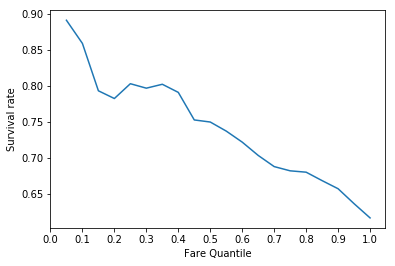

In [106]:
rate_list = []
q_list = []
j = 0

for i in range(20):
    
    j = (i+1) * 0.05
    q = df.loc[(df.Survived == 1) & (df.Fare <= df.Fare.quantile(j))]['Name'].count()
    p = df.loc[df.Fare <= df.Fare.quantile(j)]['Name'].count()
    diff = p - q
    rate = (diff/p if p!=0 else 0.0) 
    rate_list.append(rate)
    q_list.append(j)

plt.plot(q_list, rate_list)
plt.xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.ylabel('Survival rate')
plt.xlabel('Fare Quantile')
plt.show()

**For each of the following characteristics, find the median in the data:**
- Age
- Ticket price
- Siblings/spouses
- Parents/children

In [79]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**If you were to use these medians to draw numerical boundaries separating survivors from non-survivors, which of these characteristics would be the best choice and why?**

In [107]:
df.groupby('Survived')['Age'].median()

Survived
0    28.0
1    28.0
Name: Age, dtype: float64

In [108]:
df.groupby('Survived')['Fare'].median()

Survived
0    10.5
1    26.0
Name: Fare, dtype: float64

In [109]:
df.groupby('Survived')['SibSp'].median()

Survived
0    0
1    0
Name: SibSp, dtype: int64

In [110]:
df.groupby('Survived')['Parch'].median()

Survived
0    0
1    0
Name: Parch, dtype: int64

I'd use "Fare" since the medians are different for survivors and non-survivors, so you'd see most non-survivors below the overall median of 14.45, and most survivors above that.

**Plot the distribution of passenger ages. Choose visually-meaningful bin sizes and label your axes.**

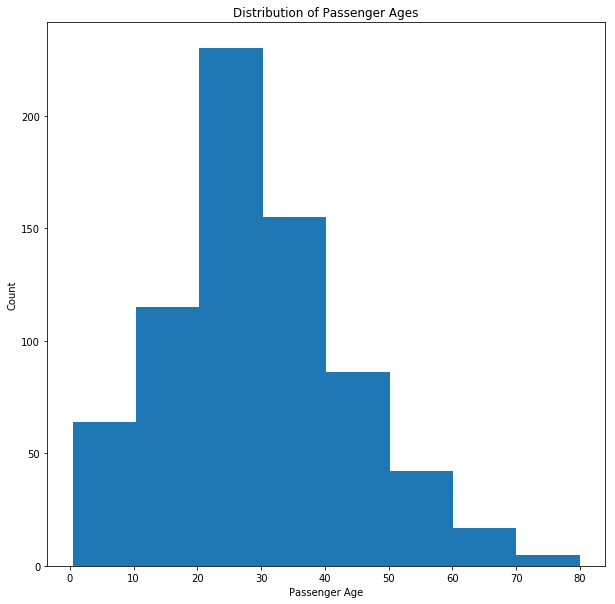

In [117]:
df.Age.plot(kind='hist', bins=8, figsize=(10, 10))
plt.xlabel('Passenger Age')
plt.ylabel('Count')
plt.title('Distribution of Passenger Ages')
plt.show()

**Find the probability that:**
- A passenger survived
- A passenger was male
- A passenger was female and had at least one sibling or spouse on board
- A survivor was from Cherbourg
- A passenger was less than 10 years old
- A passenger was between 25 and 40 years old
- A passenger was either younger than 20 years old or older than 50

In [136]:
print('The probability that:')
print('-------------------------')
print('A passenger survived: %.3f' % (len(df.loc[df.Survived == 1])/len(df)))
print('A passenger was male: %.3f' % (len(df.loc[df.Sex == 'male'])/len(df)))
mask1 = (df.Sex == 'female') & (df.SibSp > 0)
print('A passenger was female and had at least one sibling or spouse on board: %.3f' % \
      (len(df.loc[mask1])/len(df)))
mask2 = (df.Survived == 1) & (df.Embarked == 'C')
print('A survivor was from Cherbourg: %.3f' % (len(df.loc[mask2])/len(df)))
print('A passenger was less than 10 years old: %.3f' % (len(df.loc[df.Age < 10])/len(df)))
print('A passenger was between 25 and 40 years old: %.3f' % (len(df.loc[(df.Age > 25) & (df.Age < 40)])/len(df)))
print('A passenger was either younger than 20 years old or older than 50: %.3f' % \
      (len(df.loc[(df.Age < 20) | (df.Age > 50)])/len(df)))

The probability that:
-------------------------
A passenger survived: 0.384
A passenger was male: 0.648
A passenger was female and had at least one sibling or spouse on board: 0.157
A survivor from Cherbourg: 0.104
A passenger was less than 10 years old: 0.070
A passenger was between 25 and 40 years old: 0.281
A passenger was either younger than 20 years old or older than 50: 0.256


**Knowing nothing else about the passengers aside from the survival rate of the population (see question above), if I choose 100 passengers at random from the passenger list, what’s the probability that exactly 42 passengers survive?**

In [139]:
import scipy.stats  as stats

stats.binom.pmf(k=42, n=100, p=(len(df.loc[df.Survived == 1])/len(df)))

0.061330411815167886

**What’s the probability that at least 42 of those 100 passengers survive?**

In [135]:
1 - stats.binom.cdf(k=42, n=100, p=(len(df.loc[df.Survived == 1])/len(df)))

0.19807683025744727

**Write a function that takes N random samples of 100 passengers, and returns the fraction of those samples where at least 42 passengers survive.**

Choose a random seed and find approximately how many random samples you need to take before your fraction matches the probability you calculated (within Δp≈0.05Δp≈0.05).

It may help to visualize the survival fraction vs the number of random samples. Answers will vary based on the seed.

In [186]:
def survival_fraction(samples):
    np.random.seed(10)
    over_42_count = 0
    
    for i in range(samples):
        smple = np.random.choice(a=df.Survived, size=100)
        num_survivors = len(smple[smple == 1])
        if num_survivors > 41:
            over_42_count += 1
            
    return over_42_count/samples

In [184]:
len(df.loc[df.Survived == 1])/len(df) - survival_fraction(100000)

0.12563838383838383

In [185]:
len(df.loc[df.Survived == 1])/len(df) - survival_fraction(1000000)

0.1254293838383838

So far, I've tried over a million samples but not getting much improvement on the difference shown above.

**Is there a statistically significant difference between:**
- The ages of male and female survivors?
- The fares paid by passengers from Queenstown and the passengers from Cherbourg?

**If so, at what level? If not, how do you know?**

In [190]:
df.groupby(['Survived','Sex'])['Age'].mean()

Survived  Sex   
0         female    25.046875
          male      31.618056
1         female    28.847716
          male      27.276022
Name: Age, dtype: float64

In [200]:
male_survivors = df[(df.Sex == 'male') & (df.Survived == 1)]['Age'].dropna()
female_survivors = df[(df.Sex == 'female') & (df.Survived == 1)]['Age'].dropna()

In [203]:
stats.ttest_1samp(a=male_survivors, popmean=df.Age.mean())

Ttest_1sampResult(statistic=-1.4157995676653514, pvalue=0.16021077440363751)

In [205]:
stats.ttest_1samp(a=female_survivors, popmean=df.Age.mean())

Ttest_1sampResult(statistic=-0.84302885291984653, pvalue=0.40023991229471301)

Since these p-values are above 0.05, we fail to reject the null hypothesis that the difference in these means is not significant. This is using a 95% confidence level.

**Accompany your p-values with histograms showing the distributions of both compared populations.**

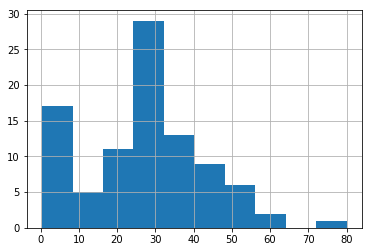

In [207]:
male_survivors.hist()

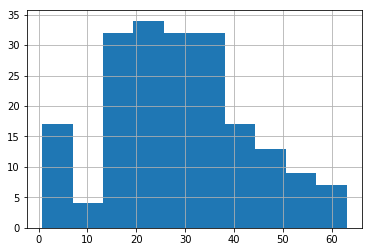

In [208]:
female_survivors.hist()

**Did survivors pay more for their tickets than those that did not? If so, to what significance level?**

In [209]:
survivor_fares = df[df.Survived == 1]['Fare'].dropna()
nonsurvivor_fares = df[df.Survived == 0]['Fare'].dropna()

In [210]:
df.groupby('Survived')['Fare'].mean()

Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64

In [211]:
stats.ttest_1samp(a=survivor_fares, popmean=df.Fare.mean())

Ttest_1sampResult(statistic=4.496115165879802, pvalue=9.4975807452292404e-06)

In [212]:
stats.ttest_1samp(a=nonsurvivor_fares, popmean=df.Fare.mean())

Ttest_1sampResult(statistic=-7.5292628677701323, pvalue=2.1133419586872428e-13)

Since both of these p-values are below 0.05 (95% conf interval) we expect to see a meaningful difference of 5% or more in fares between survivors and non-survivors.

**Did a given first-class passenger have less family members on board than a given third-class passenger? If so, to what significance level?**

In [216]:
df['Family_members'] = df.Parch + df.SibSp

In [217]:
first_family = df[df.Pclass == 1]['Family_members'].dropna()
third_family = df[df.Pclass == 3]['Family_members'].dropna()

In [218]:
stats.ttest_1samp(a=first_family, popmean=df.Family_members.mean())

Ttest_1sampResult(statistic=-1.8602973650952084, pvalue=0.064209042296076338)

In [219]:
stats.ttest_1samp(a=third_family, popmean=df.Family_members.mean())

Ttest_1sampResult(statistic=1.1744950358391355, pvalue=0.24076726566657813)